In [2]:
import quandl
data = quandl.get("CHRIS/CME_SP1", authtoken="")

In [3]:
data = data[data.index > "1997-04-01"]
data["Settle"].replace(to_replace=1, method="ffill", inplace=True)
data["Previous Day Open Interest"].replace(to_replace=0, method="ffill", inplace=True)
data["Previous Day Open Interest"].replace(to_replace=1, method="ffill", inplace=True)
data["Previous Day Open Interest"].replace(to_replace=2, method="ffill", inplace=True)
data["Previous Day Open Interest %"] = data["Previous Day Open Interest"].pct_change()
data["Previous Day Open Interest %"] = data["Previous Day Open Interest %"] + 1

In [4]:
data["Total Return Open Interest"] = data["Previous Day Open Interest %"].cumprod() * 100

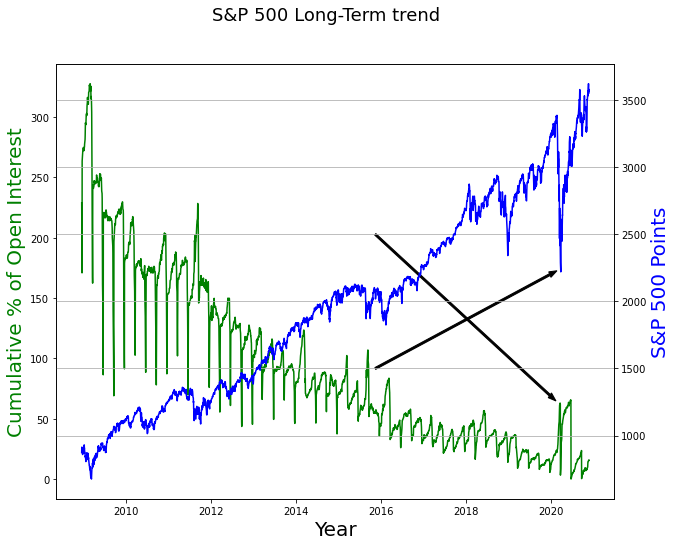

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('S&P 500 Long-Term trend', fontsize=18)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Cumulative % of Open Interest", color="green", fontsize=20)
ax2 = ax.twinx()
ax2.set_ylabel("S&P 500 Points", color="blue", fontsize=20)
data = data.iloc[-3000:]
plt.arrow(16750, 1500, 1500, 700, width = 15, color="black")
plt.arrow(16750, 2500, 1500, -1200, width = 15, color="black")
ax.plot(data.index, data["Total Return Open Interest"], color="green")
ax2.plot(data.index, data["Settle"], color="blue")
plt.grid(True)